# Data Visualization

Select a dataset we have used in class (or outside of class).

Generate a plot that you feel visualizes the data is an interesting way. Your plot should have the following elements:

>1) Title
>2) Legend
>3) Axes or other Labels
>4) Color
>5) 1 sentence description of what your plot shows
>6) Brief description of why you chose to make the plot the way you did.

You may use pandas, matplotlib, or seaborn.

Upload a pdf of the plot to Canvas.

In [1]:
import ujson as json
import pandas as pd
import numpy as np
from matplotlib import pyplot
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [2]:
records = map(json.loads, open('/users/tpaucarquintos/full_simplified_fish (1).ndjson'))
df = pd.DataFrame.from_records(records)
df

,word,countrycode,timestamp,recognized,key_id,drawing
0,fish,IT,2017-03-16 20:52:59.06772 UTC,True,6591076297080832,"[[[90, 110, 141, 176, 218, 249, 255, 254, 243,..."
1,fish,US,2017-03-24 15:21:40.31552 UTC,True,6721582066040832,"[[[41, 45, 66, 84, 97, 103], [3, 17, 47, 82, 1..."
2,fish,RU,2017-03-28 20:10:23.16336 UTC,True,5385703221362688,"[[[17, 14, 0, 2, 7, 34, 46, 106, 151, 177, 212..."
3,fish,JP,2017-03-16 11:31:55.35863 UTC,True,5751665556717568,"[[[165, 151, 132, 59, 23, 1, 0, 4, 41, 78, 116..."
4,fish,US,2017-03-11 01:26:14.24442 UTC,True,6528113636802560,"[[[89, 89, 86, 72, 28, 11, 2, 2, 39, 62, 93, 1..."
...,...,...,...,...,...,...
134145,fish,US,2017-03-08 15:39:16.82008 UTC,True,6637892531126272,"[[[5, 8, 0, 4, 12, 25, 55, 113, 133, 151, 179,..."
134146,fish,CZ,2017-03-08 08:59:58.78939 UTC,True,5285422898872320,"[[[65, 129, 169, 191, 237, 252, 255, 253, 236,..."
134147,fish,US,2017-03-06 06:12:30.91958 UTC,True,6534112464601088,"[[[125, 125], [72, 72]], [[101, 141, 152, 160,..."
134148,fish,US,2017-03-03 18:36:50.0603 UTC,True,6002407156744192,"[[[255, 252, 244, 220, 93, 43, 33, 25, 17, 9, ..."


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
df.countrycode.value_counts()

US    56717
GB     9451
CA     4832
DE     4687
AU     3328
      ...  
CD        1
BT        1
KN        1
VG        1
AN        1
Name: countrycode, Length: 174, dtype: int64

In [5]:
def make_matrix(d):
    # c_max = 0
    m = np.zeros((256,256), dtype=bool)
    for s in d:
        s_x = np.array(s[0], dtype=int)
        s_y = np.array(s[1], dtype=int)
        # c_max = max(s_x.max(), s_y.max())
        #if s_x.max() < 256 and s_y.max() < 256 and s_x.min() >= 0 and s_y.min() >= 0:
        for x, y in zip(s_x, s_y):
            m[x, y] = 1
    return m

In [6]:
df['matrix'] = df.drawing.apply(lambda d: make_matrix(d))
df['vector'] = df['matrix'].apply(lambda x: x.flatten())

In [7]:
continents = pd.read_csv('Country code.csv',delimiter="\t") 
dp = pd.DataFrame(continents)

In [8]:
country_code = 'Country code.csv'
dc = pd.read_csv(country_code)
dc = dc.fillna("No INFO")

In [9]:
merge = pd.merge(df,dc,left_on ='countrycode', right_on ='ISO (2)', how ='outer')
df = df.dropna()
df.head()

,word,countrycode,timestamp,recognized,key_id,drawing,matrix,vector
0,fish,IT,2017-03-16 20:52:59.06772 UTC,True,6591076297080832,"[[[90, 110, 141, 176, 218, 249, 255, 254, 243,...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal..."
1,fish,US,2017-03-24 15:21:40.31552 UTC,True,6721582066040832,"[[[41, 45, 66, 84, 97, 103], [3, 17, 47, 82, 1...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal..."
2,fish,RU,2017-03-28 20:10:23.16336 UTC,True,5385703221362688,"[[[17, 14, 0, 2, 7, 34, 46, 106, 151, 177, 212...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal..."
3,fish,JP,2017-03-16 11:31:55.35863 UTC,True,5751665556717568,"[[[165, 151, 132, 59, 23, 1, 0, 4, 41, 78, 116...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal..."
4,fish,US,2017-03-11 01:26:14.24442 UTC,True,6528113636802560,"[[[89, 89, 86, 72, 28, 11, 2, 2, 39, 62, 93, 1...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal..."


In [10]:
merge=merge.sort_values(by='Continent')
merge

,word,countrycode,timestamp,recognized,key_id,drawing,matrix,vector,Continent,Country,ISO (2)
134217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,Zaire (Dem Rep of Congo),ZR
131301,fish,ZA,2017-03-03 10:55:54.06526 UTC,True,4705687978377216,"[[[9, 0, 4], [54, 138, 155]], [[17, 22, 38, 57...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
131302,fish,ZA,2017-03-09 18:18:25.13824 UTC,True,6612413442949120,"[[[224, 217, 177, 162, 127, 113, 63, 52, 31, 1...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
131303,fish,ZA,2017-03-04 18:52:05.12832 UTC,True,6327815353925632,"[[[247, 245, 255, 214, 204, 196, 179, 153, 115...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
131304,fish,ZA,2017-03-29 19:23:56.95436 UTC,True,5364480445775872,"[[[56, 78, 112, 174, 217, 240, 249, 255, 253, ...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",Africa,South Africa,ZA
...,...,...,...,...,...,...,...,...,...,...,...
134112,fish,CW,2017-03-15 01:10:52.57059 UTC,True,5903179705221120,"[[[160, 148, 134, 99, 60, 33, 13, 0, 2, 7, 33,...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",NaN,NaN,NaN
134113,fish,BU,2017-01-30 10:24:06.14091 UTC,True,4933148880142336,"[[[216, 213, 206, 168, 121, 81, 26, 10, 0, 28,...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",NaN,NaN,NaN
134128,fish,MF,2017-01-23 12:03:17.31699 UTC,True,6600938670260224,"[[[249, 212, 180, 178, 200, 230], [94, 107, 12...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",NaN,NaN,NaN
134129,fish,MF,2017-01-29 21:33:34.4507 UTC,True,6492223619203072,"[[[142, 94, 74, 26, 13, 2, 0, 6, 29, 62, 100, ...","[[False, False, False, False, False, False, Fa...","[False, False, False, False, False, False, Fal...",NaN,NaN,NaN


In [15]:
merge['Continent'].value_counts()

Americas    65948
Europe      40964
Asia        20794
Oceania      4014
Africa        943
Name: Continent, dtype: int64

Text(0, 0.5, 'Number of Inputs')

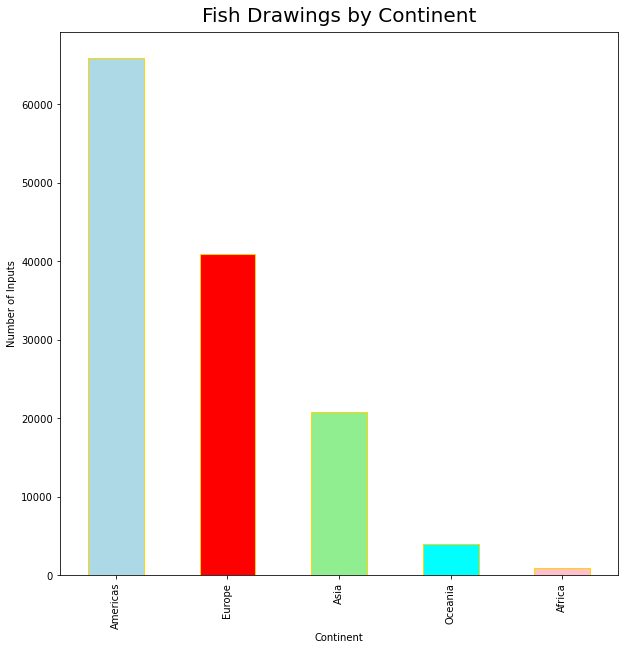

In [25]:
plt = merge['Continent'].value_counts().plot(kind='bar',color=['lightblue', 'red', 'lightgreen', 'cyan', 'pink'],edgecolor='gold',figsize=(10,10))
plt.set_title("Fish Drawings by Continent", fontsize=20, verticalalignment='bottom')
plt.set_xlabel("Continent")
plt.set_ylabel("Number of Inputs")

In [27]:
plt.figure.savefig('plot.pdf')

>5)My graph doesn't have a Legend because it already is well descriptive of my data. This bar graph shows the number of value counts per continent in my data set of Fish drawings. 

>6)I choose to do a bar graph because it is more descriptive of my data set and the visualization helps to show the difference in data set entries per continent. 